<a href="https://colab.research.google.com/github/DevLeoo/project-credit-card-fraud/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de **12,1 milhões** de pessoas já foram **vítimas** de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de **R$ 1,8 bilhão de prejuízo** por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de **Inteligência Artificial** vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

## Dicionário de variáveis

Antes de prosseguirmos com a análise é necessário ter em mente o que cada variável representa

* **Time:** Segundos decorridos entre cada transação
* **[V1, V2, V3... V28]:** Componentes gerados pelo **PCA** (não pode ser divulgado devido à sensibilidade da informação)
* **Amount:** Valor monetário da transação
* **Class:** Variável resposta. 
  * 0 = Não fraude;
  * 1 = Fraude 

## Importando os dados

Primeiramente as bibliotecas necessárias serão importadas e os dados carregados em memória para a variável _df_.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# pacotes sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.


* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

## Análise Exploratória

Durante o processo de análise exploratória, abordaremos o _dataset_ de algumas perspectivas diferentes, buscando identificar padrões e incoerências nos dados.

In [ ]:
# 5 primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 5 primeiras ultimas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# verificando os tipos de dados
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# varificando valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

> Como observado, todas colunas exceto _"Class"_ são do tipo float64 e não há valores ausentes no _dataset_!

In [ ]:
# Dimensoes do dataset
rows, cols = df.shape
print("Linhas: ", rows)
print("Colunas: ", cols)

Linhas:  284807
Colunas:  31


## Análise estatística

Iniciaremos a análise exploratória estatistica do _dataset_ com uma visualização tabular das medidas descritivas de cada variável que o compõem.

In [ ]:
# medidas descritivas
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Pelo método `describe` verificamos as medidas estistícas. Para as variáveis originárias do **PCA** não observamos nada extremamente distoante e para as outras variáveis `Time`, `Class` e `Amount`, podemos observar suas médias (mean), medianas(50% ou percentil 50) e desvio padrão (std), como por exemplo:

* `Time`:
  * mean: 94813.859575
  * std: 47488.145955
  * 50%: 84692.000000	 


* `Amount`:
  * mean: 88.349619
  * std: 250.120109	
  * 50%: 22.000000

  Sendo assim, é possível notar que a maioria das transações ocorrentes possuem valores relativamente pequenos.

Em seguida, visualizaremos a distribuição de frequência de todas as variáveis do _dataset_, exceto Time, Class e Amount as quais análisaremos posteriormente.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


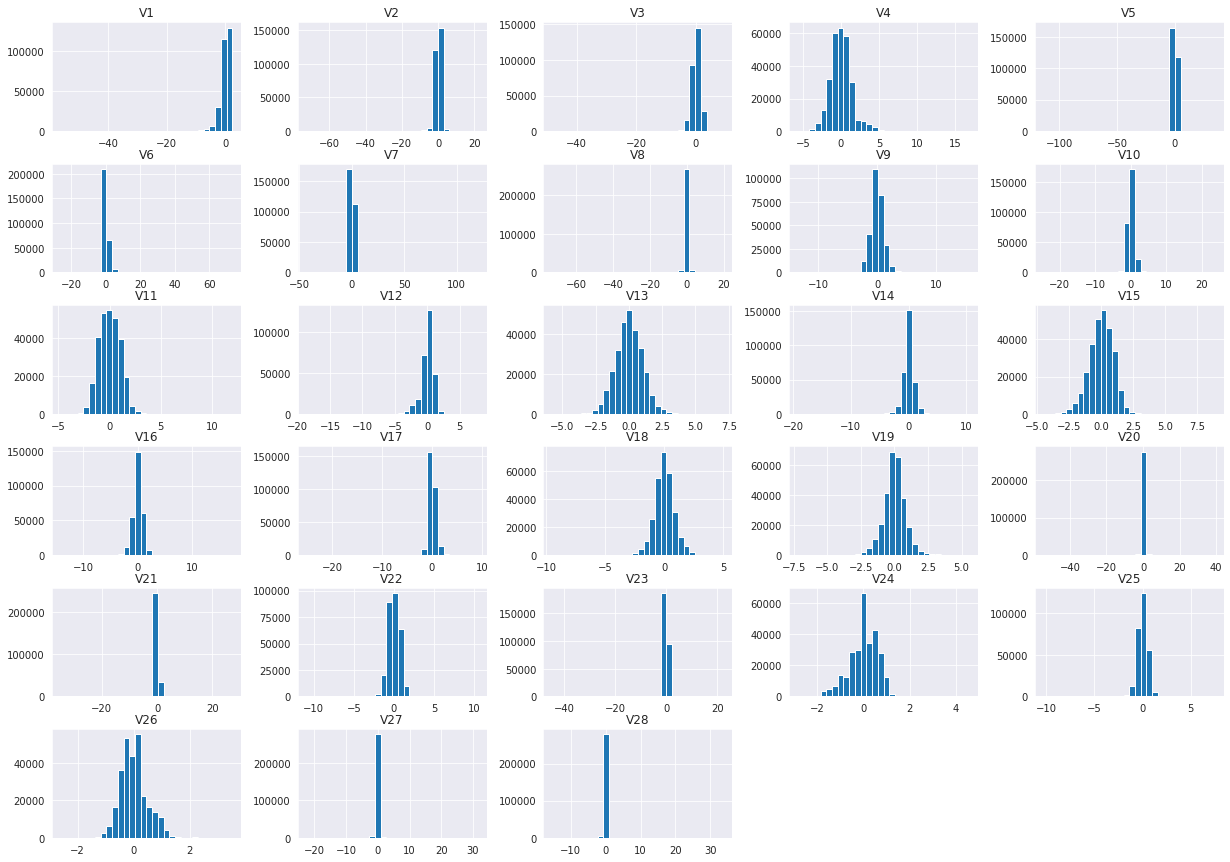

In [ ]:
df_frequency = df.drop(["Time", "Amount", "Class"], axis=1)
fig, ax = plt.subplots(figsize=(21,15))

df_frequency.hist(bins=30, ax=ax)

plt.show()

Essa visualização é interessante para notarmos certos padrões de distruibuição, por exemplo, o grupo de variáveis V11, V13, V15, V18 e V19 e V8, V20, V21, V27, e V28 distribuem-se de maneira semelhante, ao passo que outras variáveis são bem distoantes entre si.

Agora veremos gráficamente e separadamente às variáveis ***Class* e *Amount***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

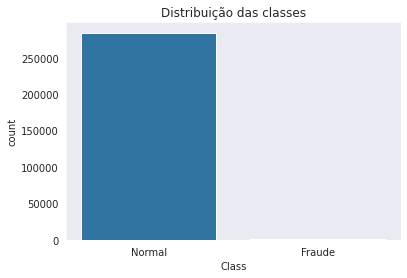

In [ ]:
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das classes')
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.plot()


> Como observado, a quantidade de transações fraudulentas é substancialmente menor que a quantidade de transações normais.




In [ ]:
qtd_fraudes = (df[df["Class"] == 1].shape[0] / df.shape[0]) * 100

print(f"Percentualmente falando, as transações fraudulentas correspondem a {round(qtd_fraudes, 2)}% do total.")

Percentualmente falando, as transações fraudulentas correspondem a 0.17% do total.


Com relação à `Amount`, gerou-se as seguintes distribuiçãos para transações fraudulentas e transações normais, porém não há nada de concreto que pode se retirar dessas informações.




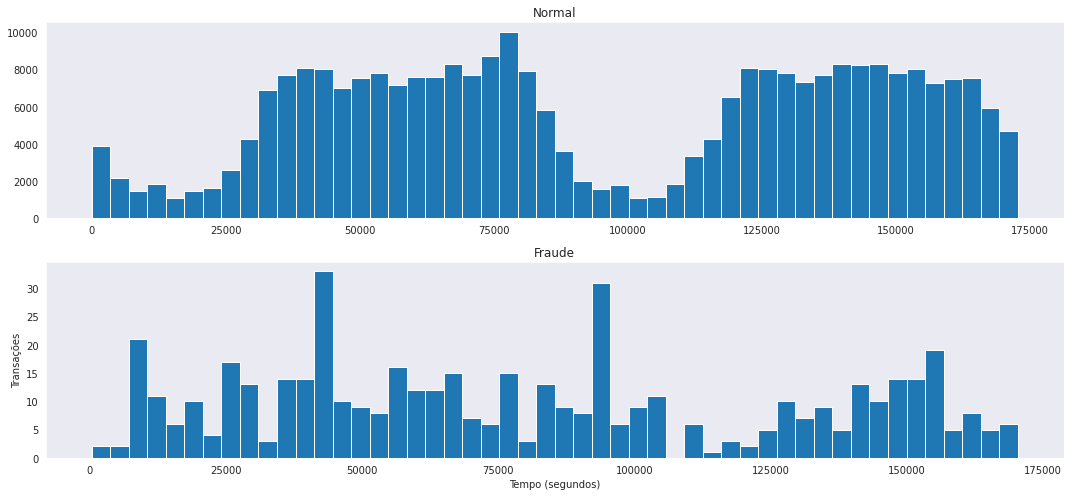

In [ ]:
fig, (ax1, ax2)= plt.subplots(nrows=2, figsize=(15,7))

ax1.hist(df.Time[df.Class == 0], bins=50)
ax1.set_title('Normal')

ax2.hist(df.Time[df.Class == 1], bins=50)
ax2.set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados tendo em vista a discrepância ocorrente para a Class = 1

In [ ]:
# copiar o data set para outra variavel
df_clean = df.copy()

In [ ]:
# observe 
display(df_clean['Amount'].shape)

(284807,)

In [ ]:
# Padronizar Time e Amount 

# utilizando standardScaler para padronizacao
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Antes de prosseguir com o balanceamento, é necessário separar o conjunto de dados entre treinamento e teste com a finalidade de termos comparativos para validar se o balanceamento foi efetivo

In [ ]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balanceamento dos dados

Para facilitar o balanceamento dos dados, será utilizada a biblioteca `imblearn`. Em seguida será gerado um gráfico de barras onde será possível observar que a discrepância foi corrigida.
 


0    369
1    369
Name: Class, dtype: int64 



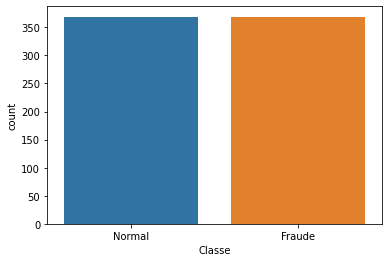

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts(), '\n')

# plotar a nova distribuição de classes
sns.countplot(x=y_rus)
plt.xticks([0,1], ["Normal", "Fraude"])
plt.xlabel("Classe")
plt.show()

## Modelo de Machine Learning

* Objetivo: construir um modelo para **classificação**.

Após o preparo e análise dos dados, será construído um modelo de Regressão Logistica que utilizara as variáveis `X_rus`, `y_rus` balanceadas.

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

## Desempenho do modelo


Nesta etapa o modelo já foi treinado e já foram feitas as predições, basta agora verificar a precisão do modelo. Para isso, utilizaremos o método `ROC Curve` que é a área sob da curva. A seguinte imagem explica o que seria essa área.

<img alt="Colaboratory logo" width="50%" src="https://www.statology.org/wp-content/uploads/2021/08/read_roc1-768x598.png">



> Antes, será necessário instalar o pacote `scikitplot`.



In [ ]:
# instalacao scikitplot
!pip install scikit-plot -d


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -d


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9698    0.9846     71079
           1     0.0484    0.8862    0.0917       123

    accuracy                         0.9697     71202
   macro avg     0.5241    0.9280    0.5381     71202
weighted avg     0.9982    0.9697    0.9830     71202

Acurácia: 0.9697

ROC Curve: 0.9280



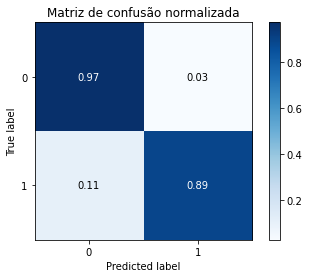

In [ ]:
import scikitplot as skplt

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, 
      y_pred, 
      normalize=True, 
      title="Matriz de confusão normalizada"
)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("ROC Curve: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Tendo criado um modelo de **classificação** por **Regressão Logística**, agora será criado um modelo de classificação seguindo o algorito **KNN** (K-Nearest Neighbours)

**KNN** é um modelo de classificação onde os novos valores são classificados com base no rótulo de outros K pontos aproximados já classificados.

Criaremos o modelo com base nas variáveis já balanceadas anteriormente.

In [ ]:
# definindo os K vizinhos
neighbors_number=4

# criando o modelo KNN
model_knn = KNeighborsClassifier(n_neighbors=neighbors_number)
model_knn.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model_knn.predict(X_test)
y_proba = model_knn.predict_proba(X_test)

Realizaremos o mesmo processo feito anteriormente para validar a precição do novo modelo criado.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9845    0.9921     71079
           1     0.0893    0.8780    0.1620       123

    accuracy                         0.9843     71202
   macro avg     0.5445    0.9313    0.5771     71202
weighted avg     0.9982    0.9843    0.9906     71202

Acurácia: 0.9843

AUC: 0.9313



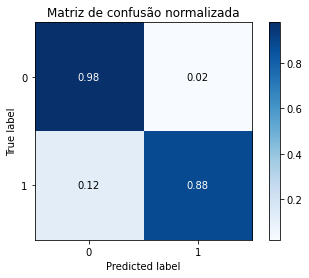

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, 
      y_pred, 
      normalize=True,
      title="Matriz de confusão normalizada"
)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Conclusão

Como observado, trata-se de um problema complexo. A base de dados estava bem completa e sem muitos casos que possivelmente ocasionariam implicações, mas devido à redução de dimensionalidade pelo PCA e a desproporcionalidade entre casos normais e fraudulentos complicaram a análise.

Pela análise exploratória inicial é possivel notar tais fatores de desproporcionalidade e distribuição dos dados. 

Nota-se que normalizar e balancear os dados é uma tarefa complexa.

Atráves da implementação dos dois modelos de classificação utilizados, observamos uma leve VANTAGEM do modelo de regressão logística perante o modelo de K-Nearest Neighbours (KNN), onde foram intencionalmente utilizados 4 vizinhos.